In [1]:
import pandas
airline = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)


In [2]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Populating the interactive namespace from numpy and matplotlib


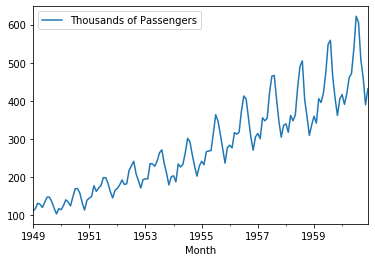

In [4]:
%pylab inline
airline.plot()

In [7]:
import pandas
df  = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)

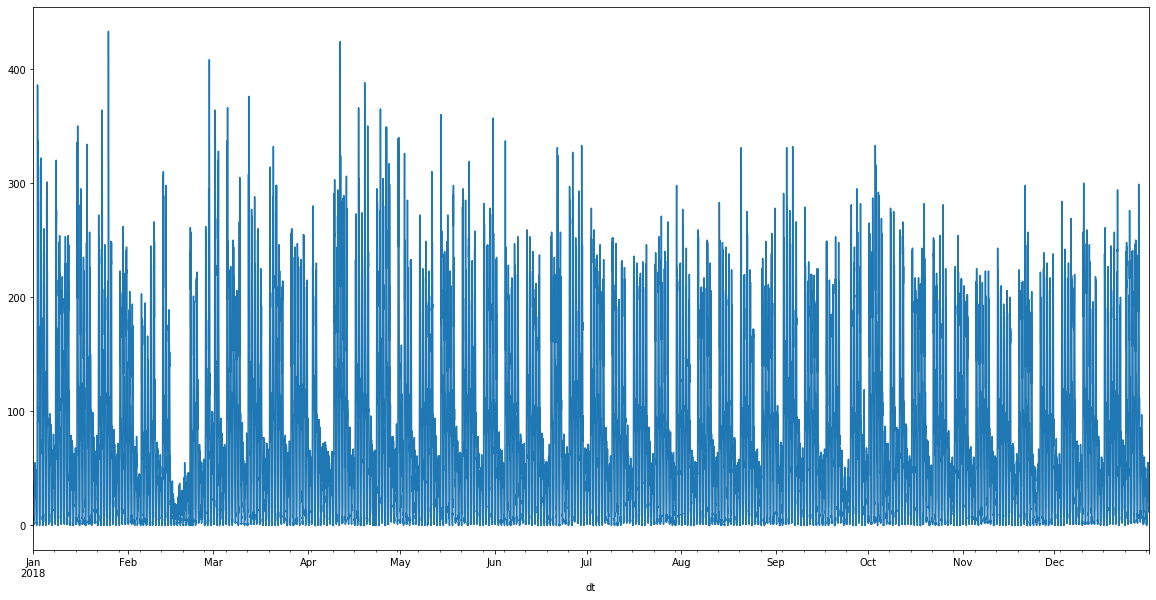

In [9]:
df['y'].plot(kind = 'line', figsize = [20,10])


## 移動平均數

In [10]:
moving_avg_6  = airline['Thousands of Passengers'].rolling(window = 6).mean()
moving_avg_12 = airline['Thousands of Passengers'].rolling(window = 12).mean()

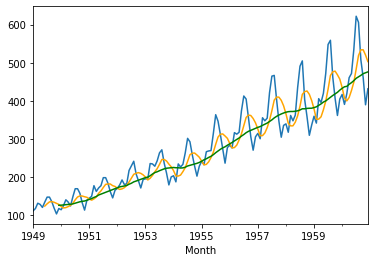

In [11]:
airline['Thousands of Passengers'].plot()
moving_avg_6.plot(color='orange')
moving_avg_12.plot(color='green')

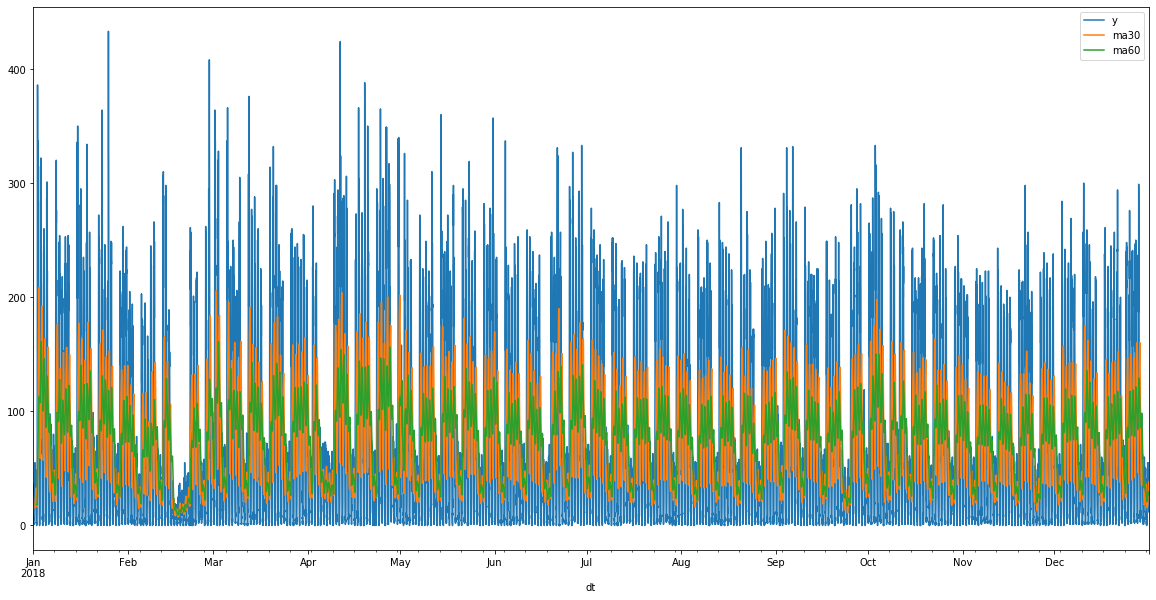

In [12]:
df['ma30'] = df['y'].rolling(window = 30).mean()
df['ma60'] = df['y'].rolling(window = 60).mean()
df[['y', 'ma30', 'ma60']].plot(kind = 'line', figsize = [20,10])


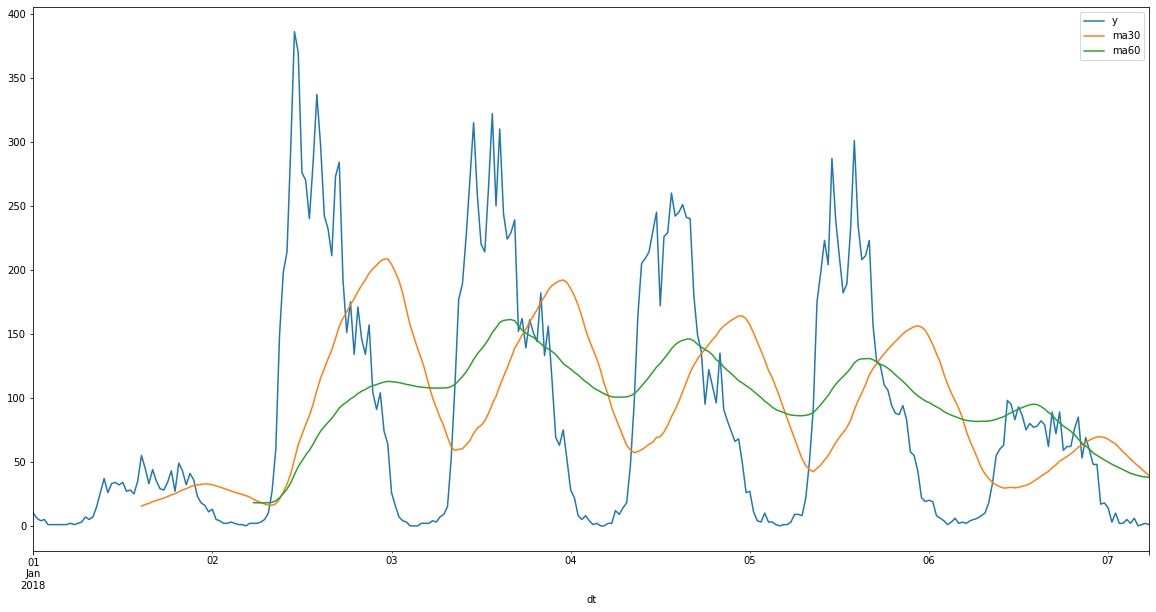

In [13]:
df.head(300)[['y', 'ma30', 'ma60']].plot(kind = 'line', figsize = [20,10])


## ETS Decomposition

In [14]:
import statsmodels
print(dir(statsmodels))

['CacheWriteWarning', 'ConvergenceWarning', 'InvalidTestWarning', 'IterationLimitWarning', 'LooseVersion', 'PytestTester', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'compat', 'datasets', 'debug_warnings', 'os', 'print_function', 'simplefilter', 'sys', 'test', 'tools', 'version']


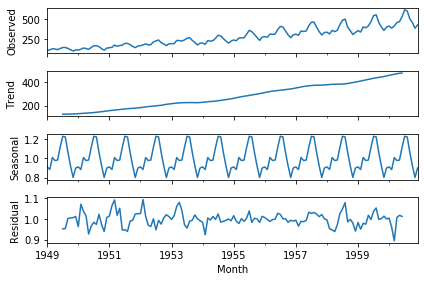

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result = seasonal_decompose(airline['Thousands of Passengers'], model='mul')
result.plot();

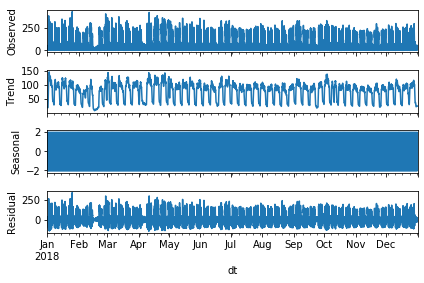

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['y'], model='add', freq=52)
result.plot();


## 簡單移動平均法

In [21]:
import numpy as np
import pandas
a = pandas.Series(np.arange(0,100, 10))

In [24]:
a

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [23]:
a.rolling(window = 5).mean()

0     NaN
1     NaN
2     NaN
3     NaN
4    20.0
5    30.0
6    40.0
7    50.0
8    60.0
9    70.0
dtype: float64

In [27]:
?a.ewm

In [30]:
a

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [28]:
a.ewm(alpha=0.9).mean()
# 0 * (1-0.9) + 10 * 0.9 = 9
# 9 * (1-0.9) + 20 * 0.9 = 18.9

0     0.000000
1     9.090909
2    18.918919
3    28.892889
4    38.889389
5    48.888949
6    58.888896
7    68.888890
8    78.888889
9    88.888889
dtype: float64

In [31]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [32]:
airline.head(12)

,Thousands of Passengers,EWMA12,12-month-SMA
Month,,,
1949-01-01,112,112.000000,NaN
1949-02-01,118,112.923077,NaN
1949-03-01,132,115.857988,NaN
1949-04-01,129,117.879836,NaN
1949-05-01,121,118.359861,NaN
1949-06-01,135,120.919883,NaN
1949-07-01,148,125.086055,NaN
1949-08-01,148,128.611277,NaN
1949-09-01,136,129.748004,NaN


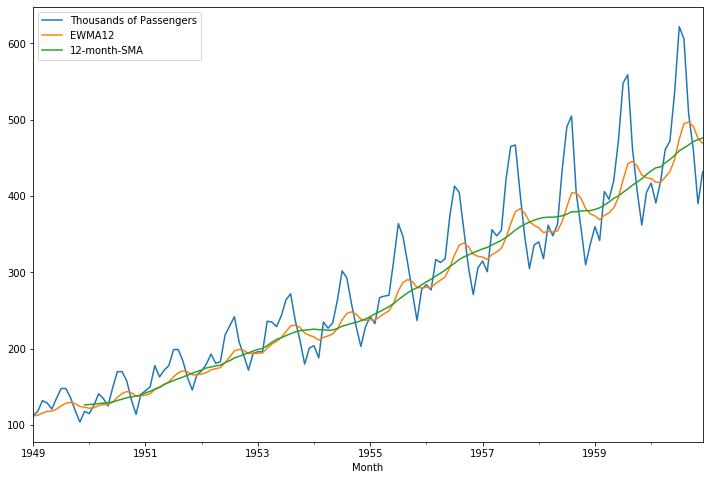

In [33]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

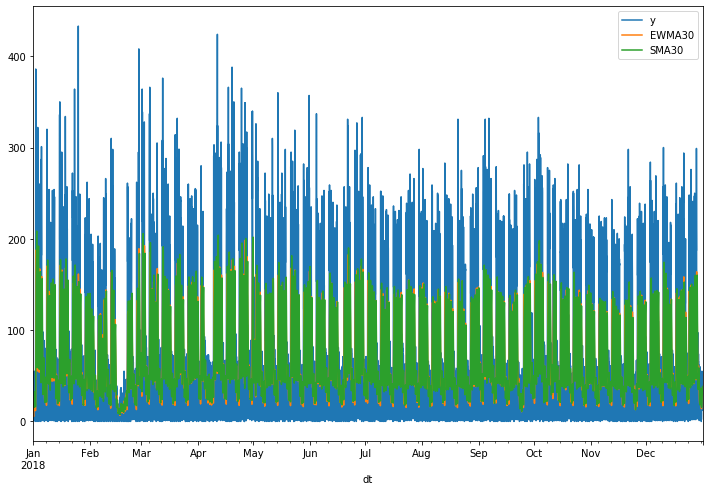

In [34]:
df['EWMA30'] = df['y'].ewm(span=30,adjust=False).mean()
df['SMA30'] = df['y'].rolling(window=30).mean()
df[['y','EWMA30','SMA30']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)


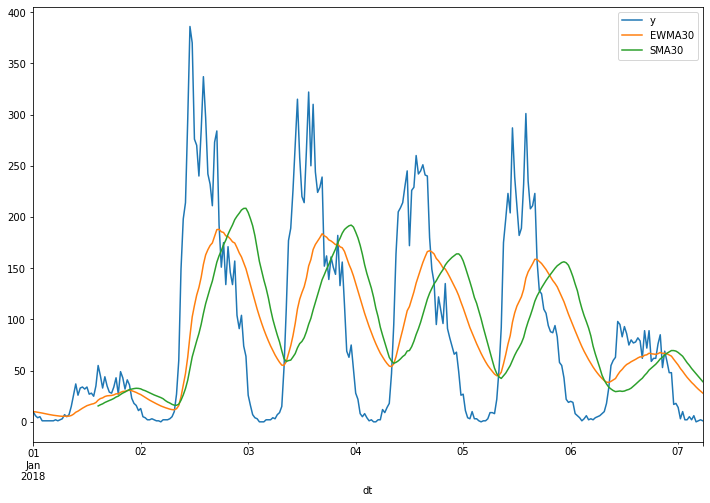

In [35]:
df[['y','EWMA30','SMA30']].head(300).plot(figsize=(12,8)).autoscale(axis='x',tight=True)


## HoltWinters

In [38]:
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA
Month,,,
1949-01-01,112,112.000000,NaN
1949-02-01,118,112.923077,NaN
1949-03-01,132,115.857988,NaN
1949-04-01,129,117.879836,NaN
1949-05-01,121,118.359861,NaN


In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span  = 12
alpha = 2/(span+1)

airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
airline['SES12']=SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline.head()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


,Thousands of Passengers,EWMA12,12-month-SMA,SES12
Month,,,,
1949-01-01,112,112.000000,NaN,112.000000
1949-02-01,118,112.923077,NaN,112.923077
1949-03-01,132,115.857988,NaN,115.857988
1949-04-01,129,117.879836,NaN,117.879836
1949-05-01,121,118.359861,NaN,118.359861


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


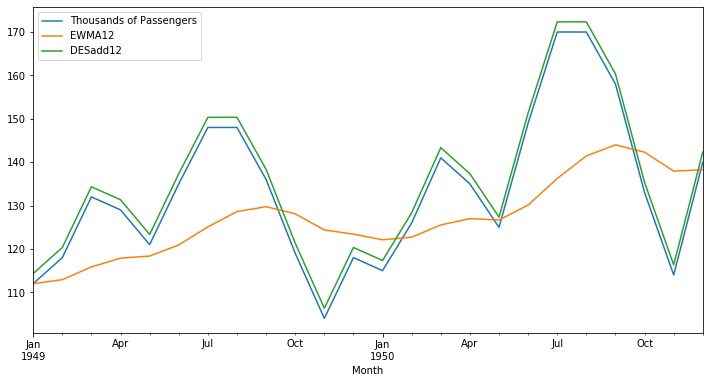

In [42]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

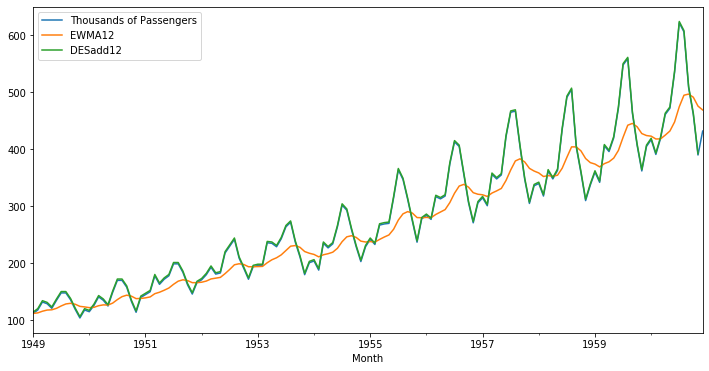

In [43]:
airline[['Thousands of Passengers','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


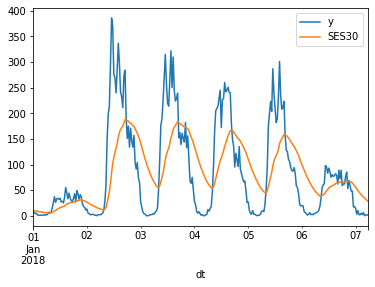

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 30
alpha = 2/(span+1)
df['EWMA30'] = df['y'].ewm(alpha=alpha,adjust=False).mean()
df['SES30']=SimpleExpSmoothing(df['y']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head(300)[['y','SES30']].plot(kind = 'line')


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


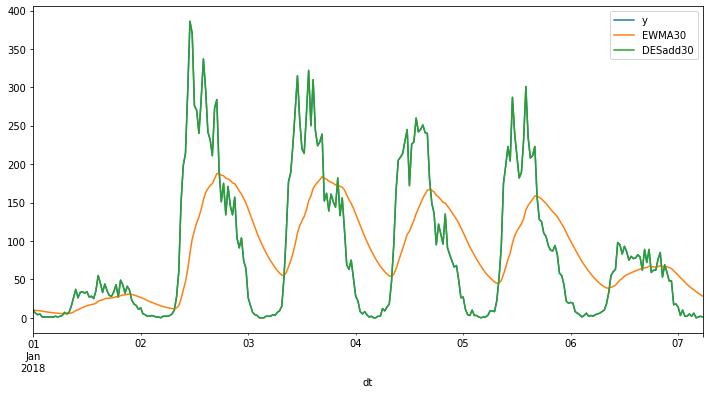

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DESadd30'] = ExponentialSmoothing(df['y'], trend='add').fit().fittedvalues.shift(-1)
df[['y','EWMA30','DESadd30']].iloc[:300].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-pack

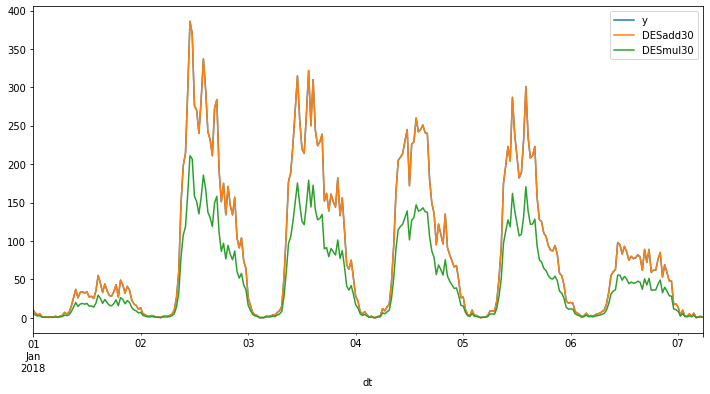

In [49]:
df['y2'] = df['y']
df.loc[df['y2'] == 0, 'y2'] = 1
df['DESmul30'] = ExponentialSmoothing(df['y2'], trend='mul').fit().fittedvalues.shift(-1)
df[['y','DESadd30','DESmul30']].iloc[:300].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


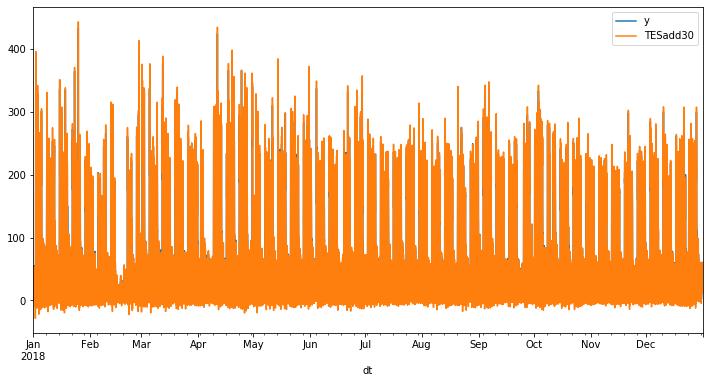

In [50]:
df['TESadd30'] = ExponentialSmoothing(df['y'],trend='add',seasonal='add',seasonal_periods=30).fit().fittedvalues
df[['y','TESadd30']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

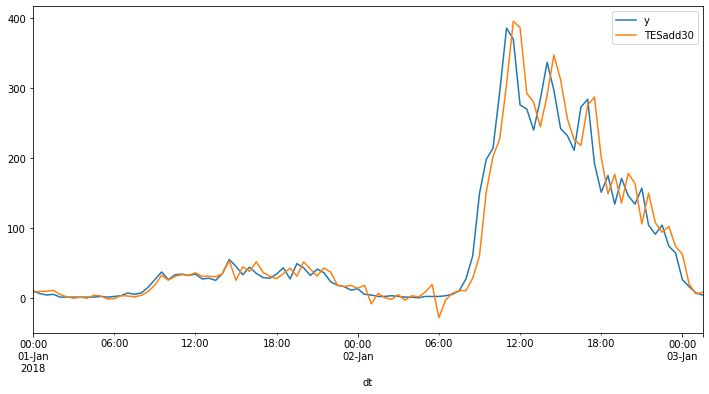

In [51]:
df[['y','TESadd30']].head(100).plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


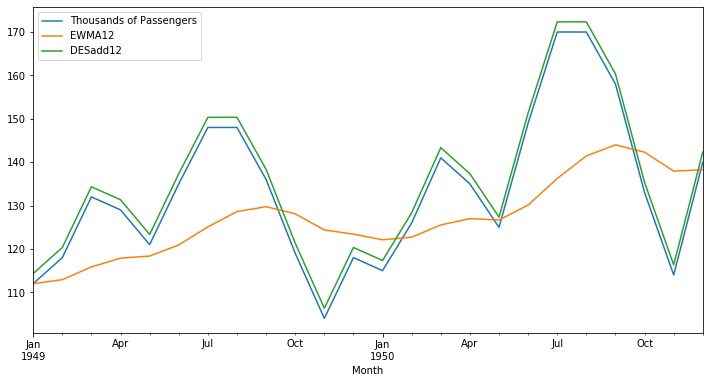

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


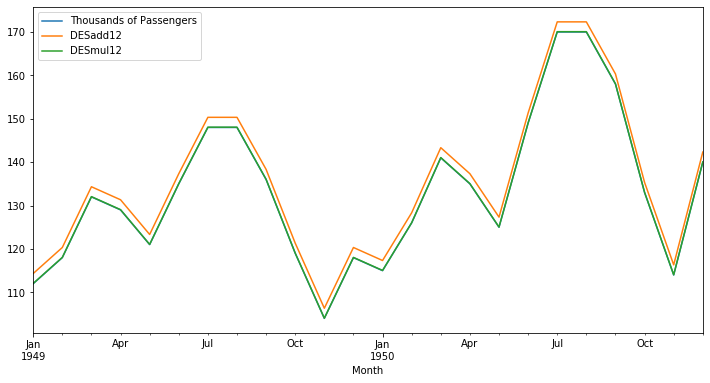

In [55]:
airline['DESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


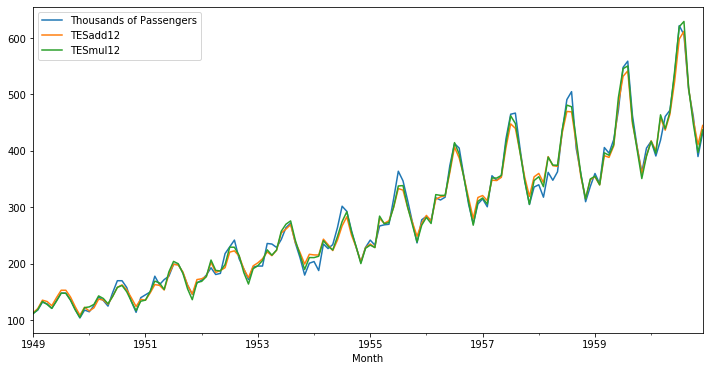

In [56]:

airline['TESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['TESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## 使用 HoltWinters 方法建立模型

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [58]:
len(df)

144

In [59]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [61]:
fitted_model.forecast(12)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1958-01-01    344.652462
1958-02-01    335.516445
1958-03-01    393.779830
1958-04-01    384.495099
1958-05-01    390.572197
1958-06-01    452.927730
1958-07-01    499.935723
1958-08-01    489.536335
1958-09-01    425.554056
1958-10-01    369.258403
1958-11-01    323.345355
1958-12-01    369.142533
Freq: MS, dtype: float64

In [62]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


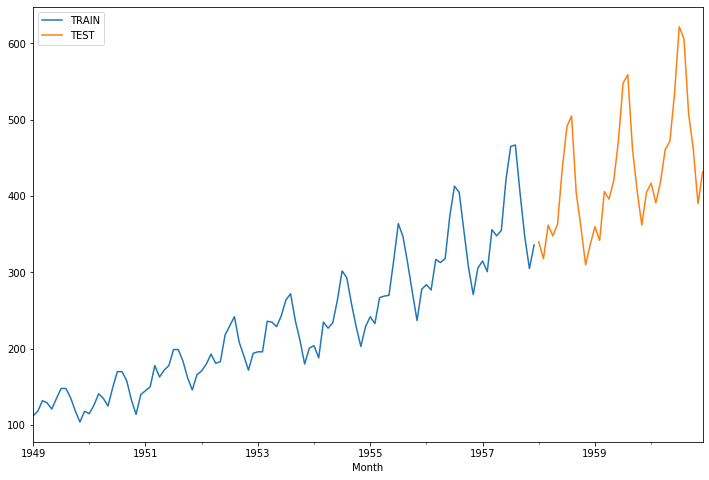

In [63]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

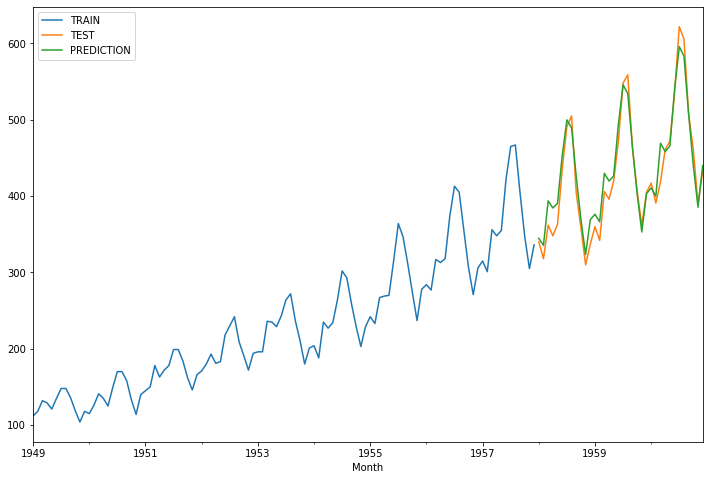

In [64]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

Populating the interactive namespace from numpy and matplotlib


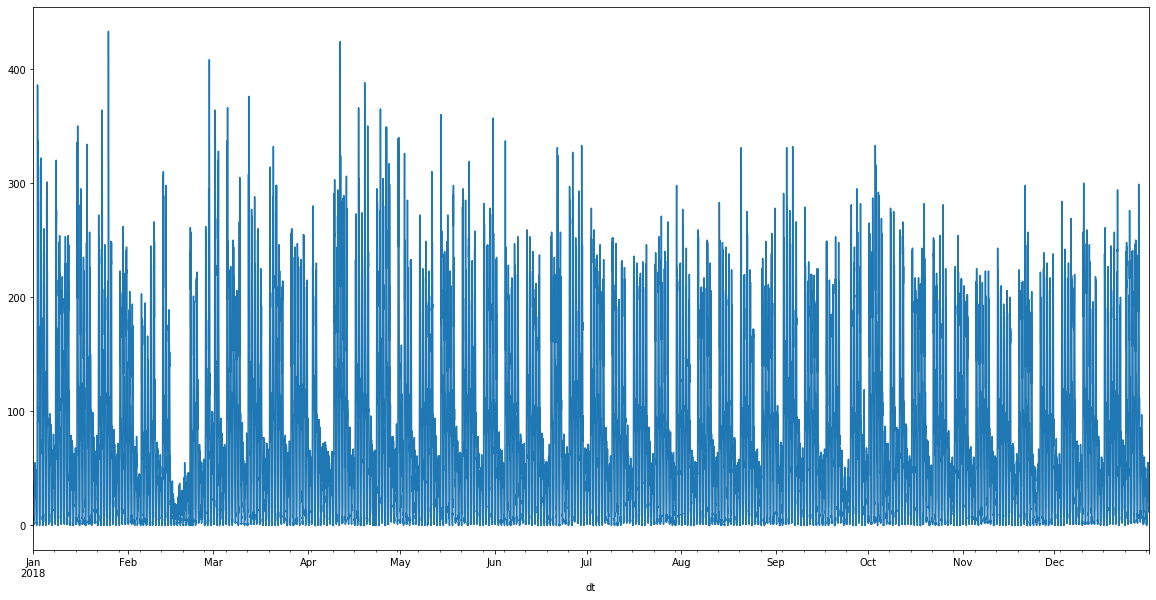

In [65]:
%pylab inline
import pandas
df = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])


In [76]:
df.index.freq = '30T'

In [77]:
len(df)

17520

In [78]:
len(df) * 0.75

13140.0

In [79]:
train_data = df.iloc[:13140] 
test_data = df.iloc[13140:]


In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model =ExponentialSmoothing(train_data['y'],trend='add', seasonal= 'add', seasonal_periods= 48).fit()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


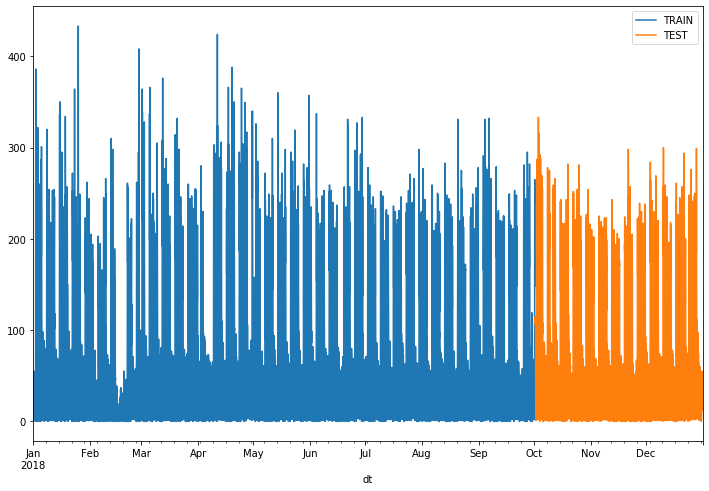

In [86]:
test_predictions = fitted_model.forecast(4380).rename('HW Forecast')
train_data['y'].plot(legend=True,label='TRAIN')
test_data['y'].plot(legend=True,label='TEST',figsize=(12,8));


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


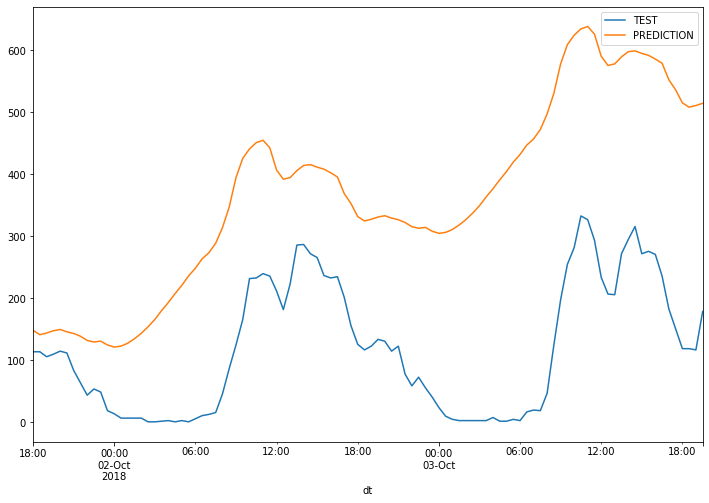

In [87]:
test_predictions = fitted_model.forecast(100).rename('HW Forecast')
test_data['y'].iloc[:100].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


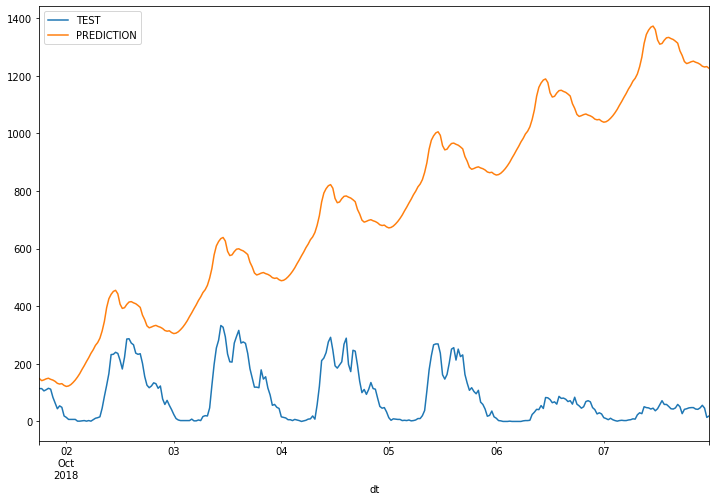

In [88]:
test_predictions = fitted_model.forecast(300).rename('HW Forecast')
test_data['y'].iloc[:300].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


In [91]:
test_data['y']

dt
2018-10-01 18:00:00    114
2018-10-01 18:30:00    114
2018-10-01 19:00:00    106
2018-10-01 19:30:00    110
2018-10-01 20:00:00    115
2018-10-01 20:30:00    112
2018-10-01 21:00:00     84
2018-10-01 21:30:00     64
2018-10-01 22:00:00     44
2018-10-01 22:30:00     54
2018-10-01 23:00:00     49
2018-10-01 23:30:00     19
2018-10-02 00:00:00     14
2018-10-02 00:30:00      7
2018-10-02 01:00:00      7
2018-10-02 01:30:00      7
2018-10-02 02:00:00      7
2018-10-02 02:30:00      1
2018-10-02 03:00:00      1
2018-10-02 03:30:00      2
2018-10-02 04:00:00      3
2018-10-02 04:30:00      1
2018-10-02 05:00:00      3
2018-10-02 05:30:00      1
2018-10-02 06:00:00      6
2018-10-02 06:30:00     11
2018-10-02 07:00:00     13
2018-10-02 07:30:00     16
2018-10-02 08:00:00     46
2018-10-02 08:30:00     87
                      ... 
2018-12-31 09:00:00     30
2018-12-31 09:30:00     47
2018-12-31 10:00:00     44
2018-12-31 10:30:00     50
2018-12-31 11:00:00     47
2018-12-31 11:30:00     4

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

test_predictions = fitted_model.forecast(4380).rename('HW Forecast')
mean_squared_error(test_data['y'], test_predictions)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


95086197.09944353

In [94]:
import numpy as np
np.sqrt(mean_squared_error(test_data['y'], test_predictions))

9751.215160145095

In [95]:
mean_absolute_error(test_data['y'],test_predictions)

8468.590623665255

## ARIMA

### 平穩序列

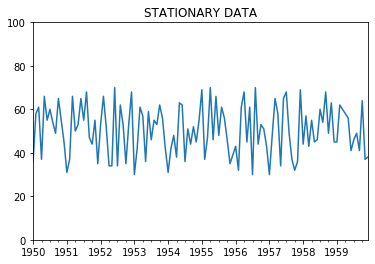

In [96]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/samples.csv',index_col=0,parse_dates=True) 
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);


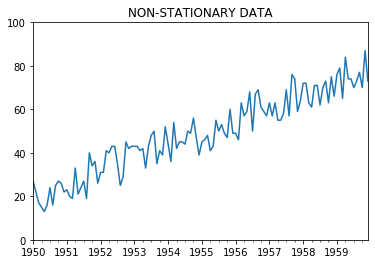

In [97]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);


In [99]:
df2['b'].head() 

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [100]:
df2['b'].shift(1).head() 

1950-01-01     NaN
1950-02-01    27.0
1950-03-01    22.0
1950-04-01    17.0
1950-05-01    15.0
Name: b, dtype: float64

In [101]:
df2['d1b'] = df2['b'] - df2['b'].shift(1)
df2['d1b'].head()
#df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);


1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: d1b, dtype: float64

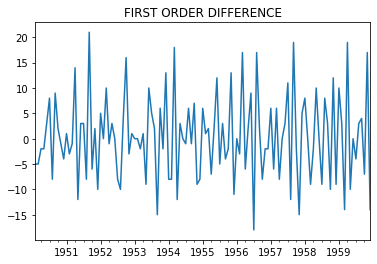

In [102]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);


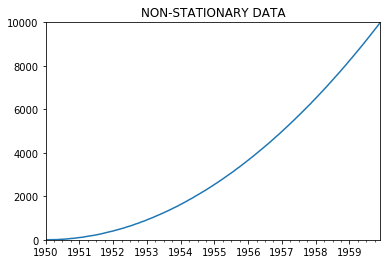

In [103]:
df2['c'].plot(ylim=[0,10000],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);


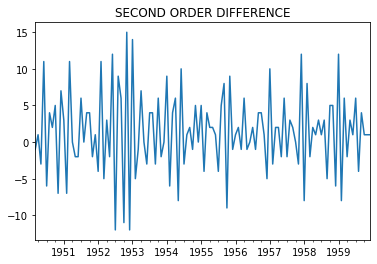

In [104]:
df2['d2c'] = df2['c'].diff().diff()
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True)


In [105]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


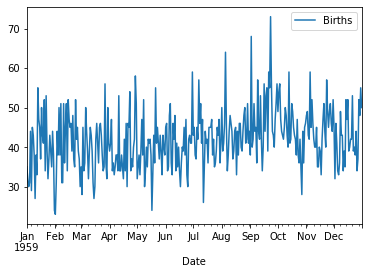

In [107]:
df2.plot()

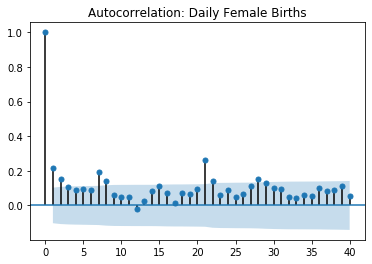

In [108]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);


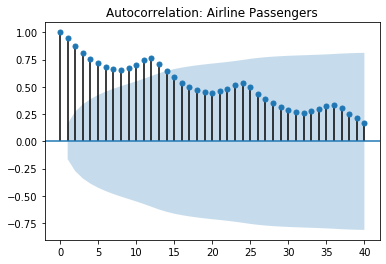

In [109]:
acf(df1['Thousands of Passengers'])
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);


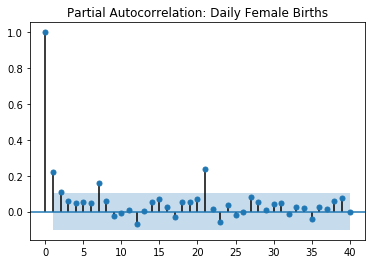

In [111]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);


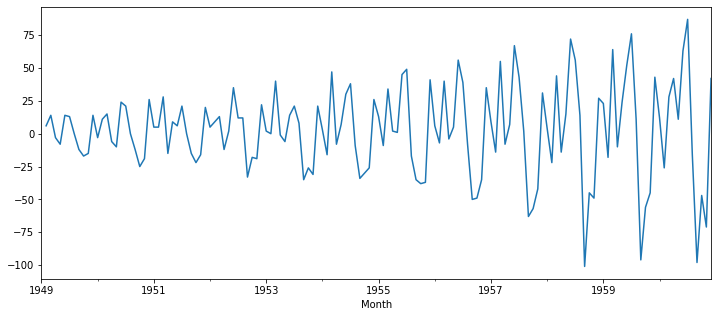

In [112]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5))


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


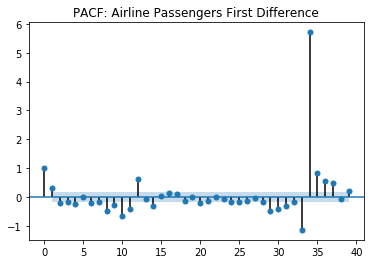

In [113]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));



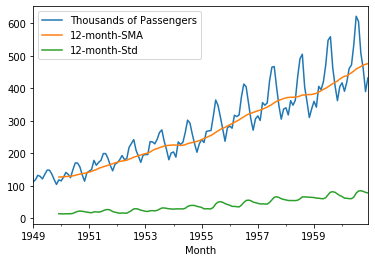

In [114]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();


In [115]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print(dfout)


Augmented Dickey-Fuller Test on Airline Data
ADF test statistic      0.815369
p-value                 0.991880
# lags used            13.000000
# observations        130.000000
dtype: float64


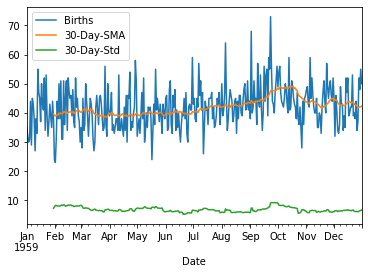

In [116]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();


In [119]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df2['Births'], autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print(dfout)


Augmented Dickey-Fuller Test on Airline Data
ADF test statistic     -4.808291
p-value                 0.000052
# lags used             6.000000
# observations        358.000000
dtype: float64


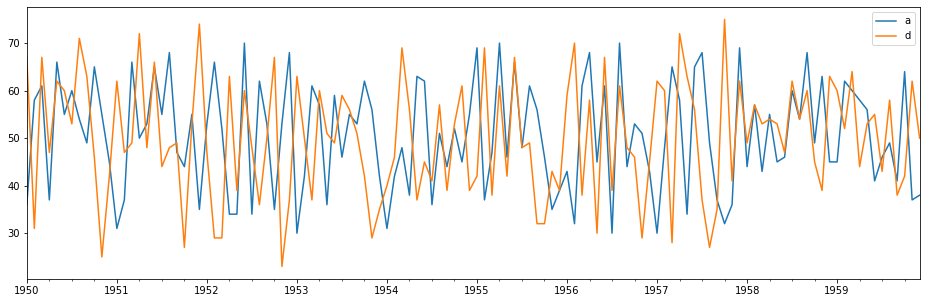

In [120]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/samples.csv',index_col=0,parse_dates=True) 

df3.index.freq = 'MS'
df3[['a','d']].plot(figsize=(16,5));


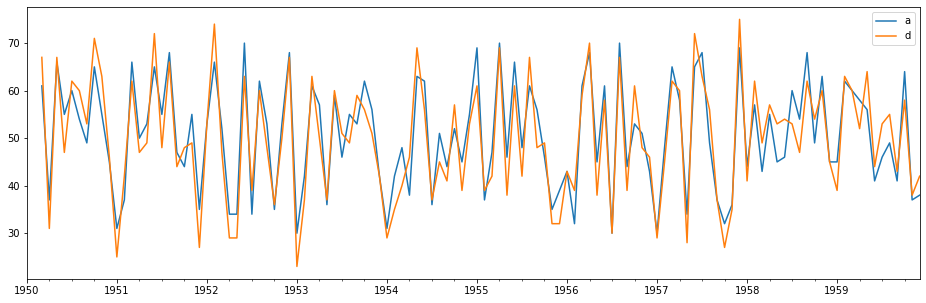

In [121]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);


In [122]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','d']],maxlag=3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.70512510516811, 0.1942027811635688, 116.0, 1),
   'ssr_chi2test': (1.7492231682328025, 0.18597442074424253, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681275, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.033942625561, 6.025362015680817e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365698, 1.907417667905223e-130, 2),
   'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.03394262556435, 6.025362015677438e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.7446232861624, 3.2288482941467694e-43, 110.0, 3),
   'ssr_chi2test': (602.2669343040274, 3.2505045874681137e-130, 3),
   'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.74462328615994, 3.2288482941487054e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [123]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()


,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


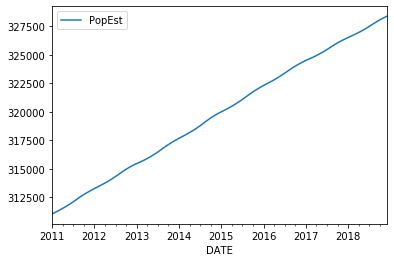

In [124]:
df.plot();

In [125]:
train = df.iloc[:84]
test = df.iloc[84:]


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Lag: 1
Coefficients:
const        149.434881
L1.PopEst      0.999530
dtype: float64
predicted=326374.148 , expected=326527
predicted=326370.2977, expected=326669
predicted=326366.4493, expected=326812
predicted=326362.6027, expected=326968
predicted=326358.7579, expected=327134
predicted=326354.9149, expected=327312
predicted=326351.0737, expected=327502
predicted=326347.2343, expected=327698
predicted=326343.3967, expected=327893
predicted=326339.5609, expected=328077
predicted=326335.7269, expected=328241
predicted=326331.8947, expected=328393


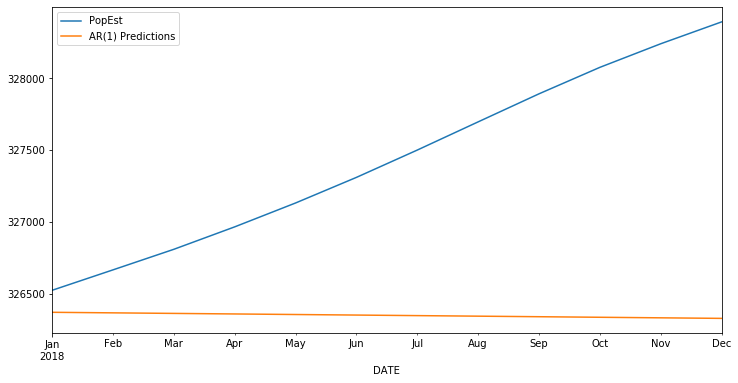

In [126]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Lag: 2
Coefficients:
const        128.075327
L1.PopEst      1.996565
L2.PopEst     -0.996967
dtype: float64


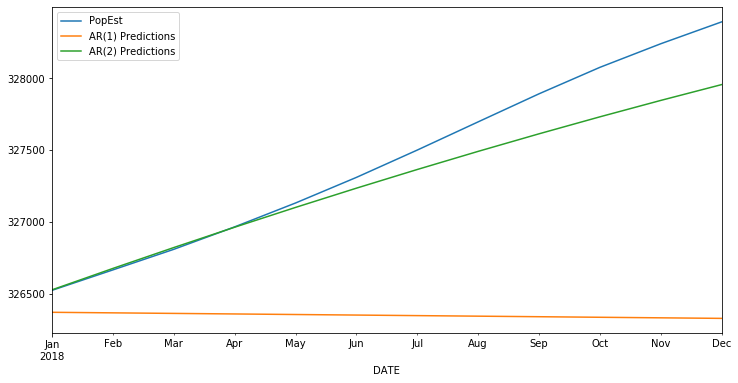

In [128]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')


start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Lag: 11
Coefficients:
const         96.056375
L1.PopEst      2.329419
L2.PopEst     -2.205518
L3.PopEst      1.617599
L4.PopEst     -1.220375
L5.PopEst      0.816533
L6.PopEst     -0.976180
L7.PopEst      0.970075
L8.PopEst     -0.248321
L9.PopEst      0.012590
L10.PopEst    -0.024572
L11.PopEst    -0.071554
dtype: float64


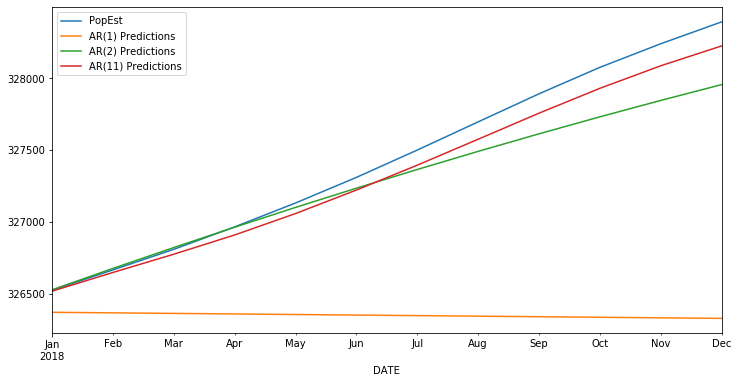

In [129]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));


In [130]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')


AR(1) Error: 1553500.453
AR(2) Error: 50682.31966
AR(11) Error: 11184.77493
AR(1) AIC: 3.4229
AR(2) AIC: 3.4468
AR(11) AIC:  3.661


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


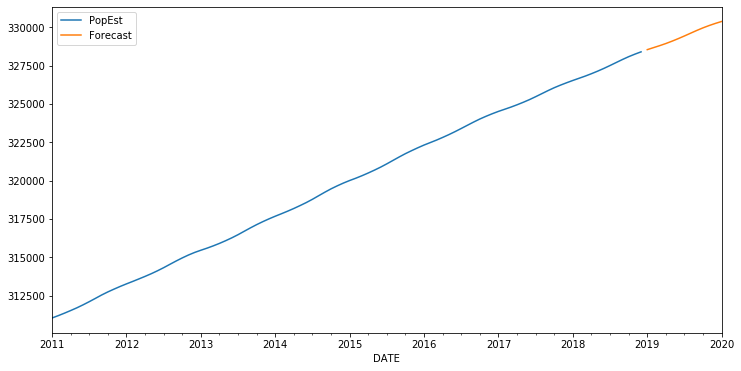

In [131]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=11,method='mle')
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));


In [133]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()


Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.268 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.875, BIC=2485.258, Fit time=0.594 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.154 seconds
Total fit time: 1.224 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Mon, 11 Nov 2019   AIC                           2460.154
Time:                        14:05:30   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [135]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.399 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.022 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.282 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.327 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.120 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=1.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.961, BIC=1034.212, Fit time=3.294 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.372, BIC=1047.748, Fit time=2.974 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.096, BIC=1038.222, Fit time=4.215 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.480
Date:                            Mon, 11 Nov 2019   AIC                           1016.961
Time:                                    14:06:57   BIC                           1034.212
Sample:                                         0   HQIC                          1023.971
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.179      0.027      0.978      -0.347       0.356
ar.L1         -0.3769      0.077     -4.896      0.000      -0.528      -0.226
ar.S.L12       0.6889      0.141      4.896      0.000       0.413       0.965
ar.S.L24       0.3092      0.107      2.884      0.004       0.099       0.519
ma.S.L12      -0.9730      0.498     -1.953      0.051      -1.950       0.004
sigma2       113.3532     47.403      2.391      0.017      20.445     206.262
===================================================================================
Ljung-Box (Q):                       58.64   Jarque-Bera (JB):                12.08
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120] 

df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'


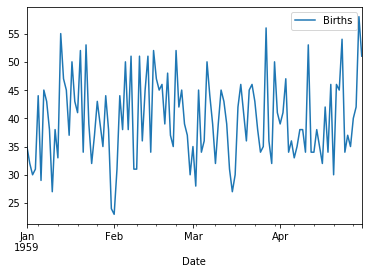

In [137]:
df1.plot();

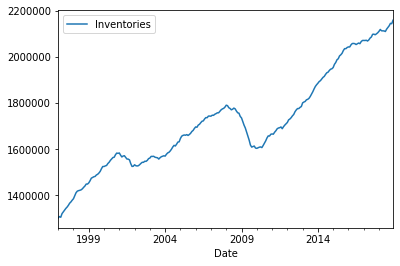

In [138]:
df2.plot();

In [139]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


In [140]:
adf_test(df1['Births'])


Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [141]:
auto_arima(df1['Births'],seasonal=False).summary()


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:674: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-ki

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Mon, 11 Nov 2019   AIC                            822.741
Time:                        14:09:19   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8162      0.108    368.858      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.938      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.034      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.128      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.021      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

In [142]:
train = df1.iloc[:90]
test = df1.iloc[90:]

from statsmodels.tsa.arima_model import ARMA
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 11 Nov 2019   AIC                            627.809
Time:                        14:09:31   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


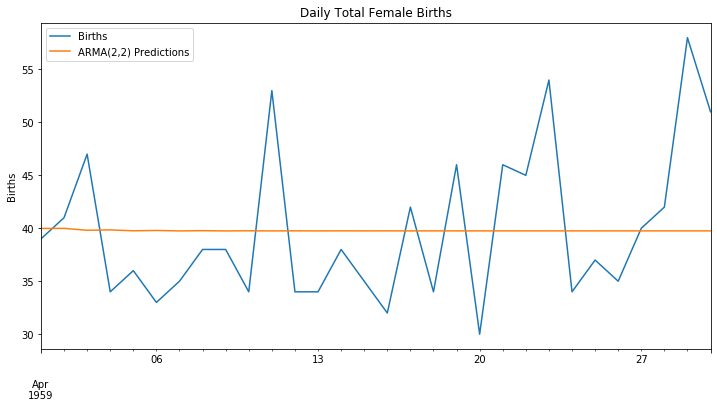

In [143]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' 

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


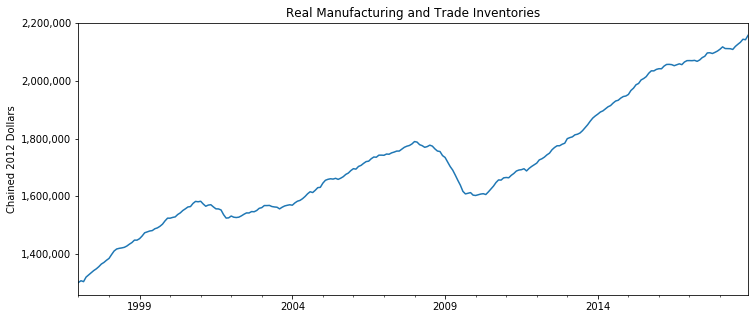

In [144]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' 

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);


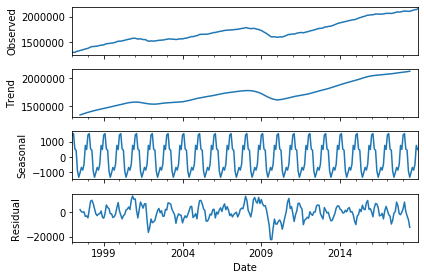

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')
result.plot();


In [146]:
auto_arima(df2['Inventories'],seasonal=False).summary()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Mon, 11 Nov 2019   AIC                           5228.505
Time:                        14:10:54   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3463.1822   1313.137      2.637      0.009     889.481    6036.884
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [147]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['Inventories'],k_diff=1)

adf_test(df2['d1'],'Real Manufacturing and Trade Inventories')


Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


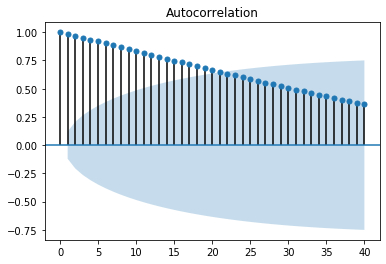

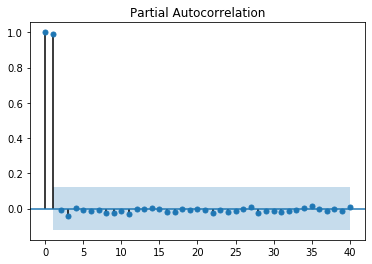

In [148]:
title = 'Autocorrelation'
lags = 40
plot_acf(df2['Inventories'],title=title,lags=lags);


title = 'Partial Autocorrelation'
lags = 40
plot_pacf(df2['Inventories'],title=title,lags=lags);


In [149]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
		suppress_warnings=True,  
		stepwise=True)           

stepwise_fit.summary()


Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.074 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.075 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.841, Fit time=0.105 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.387, Fit time=0.194 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.110 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.170 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.755 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.259
Date:                Mon, 11 Nov 2019   AIC                           5228.505
Time:                        14:11:40   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3463.1822   1313.137      2.637      0.009     889.481    6036.884
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [151]:
from statsmodels.tsa.arima_model import ARIMA

train = df2.iloc[:252]
test = df2.iloc[252:]

model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.012
Date:                Mon, 11 Nov 2019   AIC                           4980.788
Time:                        14:12:36   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3223.4646   1344.859      2.397      0.017     587.590    5859.339
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


predicted=2107154.028, expected=2110158
predicted=2110539.56 , expected=2118199
predicted=2113909.3  , expected=2112427
predicted=2117264.788, expected=2112276
predicted=2120607.41 , expected=2111835
predicted=2123938.423, expected=2109298
predicted=2127258.956, expected=2119618
predicted=2130570.03 , expected=2127170
predicted=2133872.568, expected=2134172
predicted=2137167.401, expected=2144639
predicted=2140455.28 , expected=2143001
predicted=2143736.883, expected=2158115


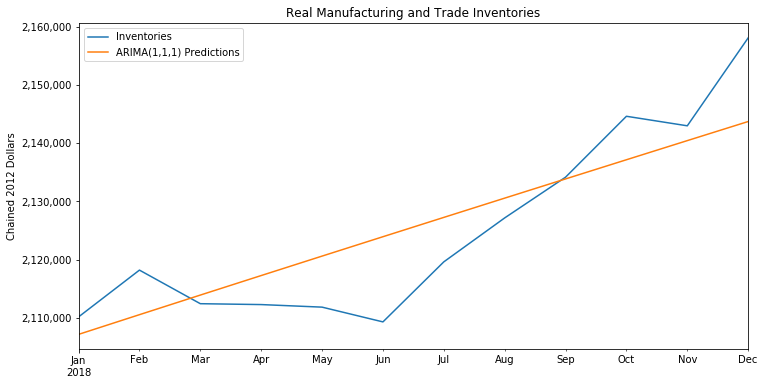

In [152]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")
	
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' 

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);


In [153]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')


ARIMA(1,1,1) MSE Error: 60428586.26
ARIMA(1,1,1) RMSE Error: 7773.582589


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


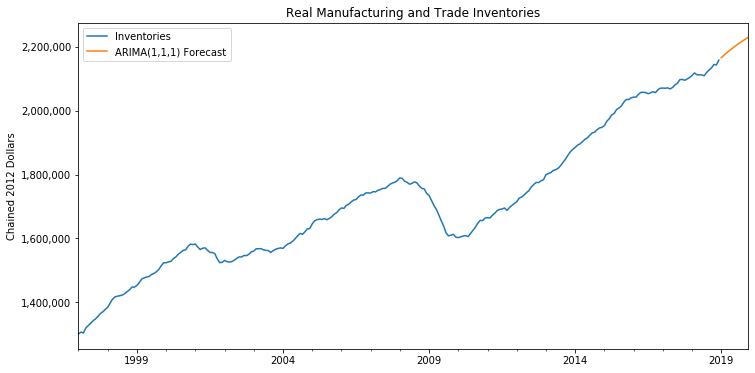

In [154]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' 

ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);


## 應用 ARIMA 在進線資料

In [155]:
import pandas
df  = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)

In [156]:
train_data = df.iloc[:13140] 
test_data = df.iloc[13140:]


In [162]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train_data['y'], start_p=0, start_q=0,start_d=0,
                        max_p=3, max_d=3,max_q=3, m=48,
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)
stepwise_fit.summary()


Fit ARIMA: order=(0, 0, 0); AIC=152196.992, BIC=152211.959, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=119499.102, BIC=119521.552, Fit time=0.303 seconds
Fit ARIMA: order=(0, 0, 1); AIC=138667.492, BIC=138689.942, Fit time=0.659 seconds
Fit ARIMA: order=(2, 0, 0); AIC=118880.656, BIC=118910.590, Fit time=0.360 seconds
Fit ARIMA: order=(2, 0, 1); AIC=118368.874, BIC=118406.291, Fit time=2.887 seconds
Fit ARIMA: order=(3, 0, 2); AIC=118264.352, BIC=118316.735, Fit time=5.604 seconds
Fit ARIMA: order=(2, 0, 2); AIC=118308.986, BIC=118353.887, Fit time=4.745 seconds
Fit ARIMA: order=(3, 0, 1); AIC=118295.787, BIC=118340.688, Fit time=4.643 seconds
Fit ARIMA: order=(3, 0, 3); AIC=118176.659, BIC=118236.526, Fit time=6.264 seconds
Fit ARIMA: order=(2, 0, 3); AIC=118176.595, BIC=118228.978, Fit time=5.330 seconds
Fit ARIMA: order=(1, 0, 2); AIC=118615.277, BIC=118652.694, Fit time=2.760 seconds
Fit ARIMA: order=(1, 0, 3); AIC=118495.810, BIC=118540.710, Fit time=3.176 seconds
Tota

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                13140
Model:                     ARMA(2, 3)   Log Likelihood              -59081.297
Method:                       css-mle   S.D. of innovations             21.699
Date:                Mon, 11 Nov 2019   AIC                         118176.595
Time:                        14:17:20   BIC                         118228.978
Sample:                             0   HQIC                        118194.088
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.0255      1.635     47.098      0.000      73.820      80.231
ar.L1.y        1.8983      0.005    391.304      0.000       1.889       1.908
ar.L2.y       -0.9118      0.005   -196.960      0.000      -0.921      -0.903
ma.L1.y       -0.8037      0.010    -82.283      0.000      -0.823      -0.785
ma.L2.y        0.0266      0.012      2.289      0.022       0.004       0.049
ma.L3.y       -0.1061      0.009    -11.766      0.000      -0.124      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0410           -0.1147j            1.0473           -0.0175
AR.2            1.0410           +0.1147j            1.0473            0.0175
MA.1            1.1061           -0.0000j            1.1061           -0.0000
MA.2           -0.4278           -2.8879j            2.9194           -0.2734
MA.3           -0.4278           +2.8879j            2.9194            0.2734
-----------------------------------------------------------------------------
"""

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


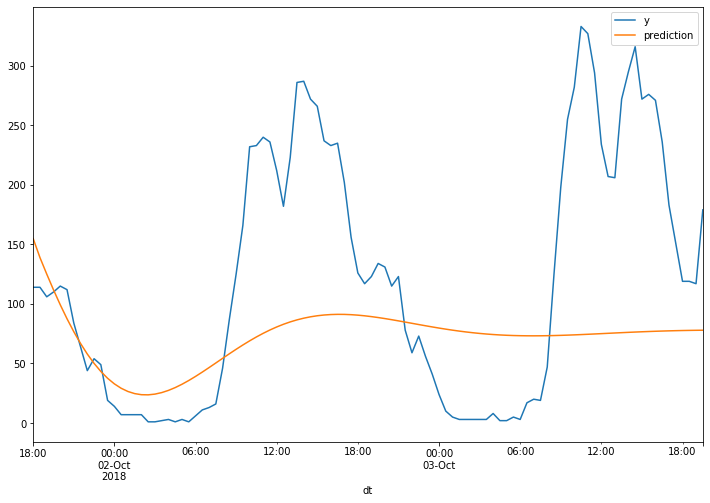

In [165]:
test_predictions = stepwise_fit.predict(4380)
test_data['prediction']=test_predictions
test_data[['y', 'prediction']].iloc[:100].plot(legend=True,label='TEST',figsize=(12,8))

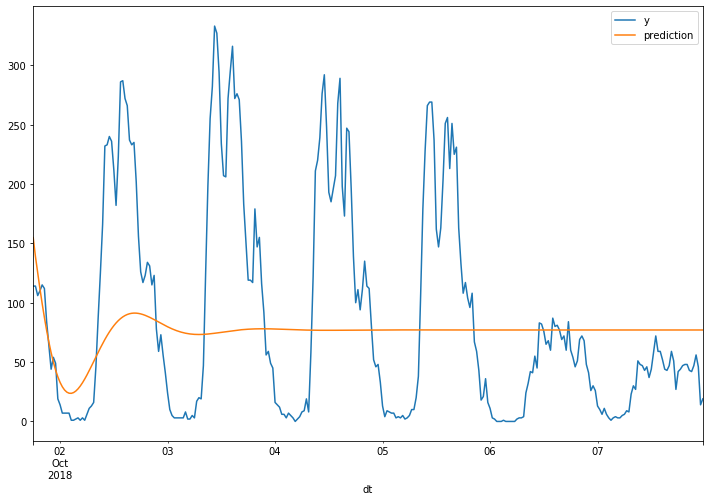

In [166]:
test_data[['y', 'prediction']].iloc[:300].plot(legend=True,label='TEST',figsize=(12,8))